[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

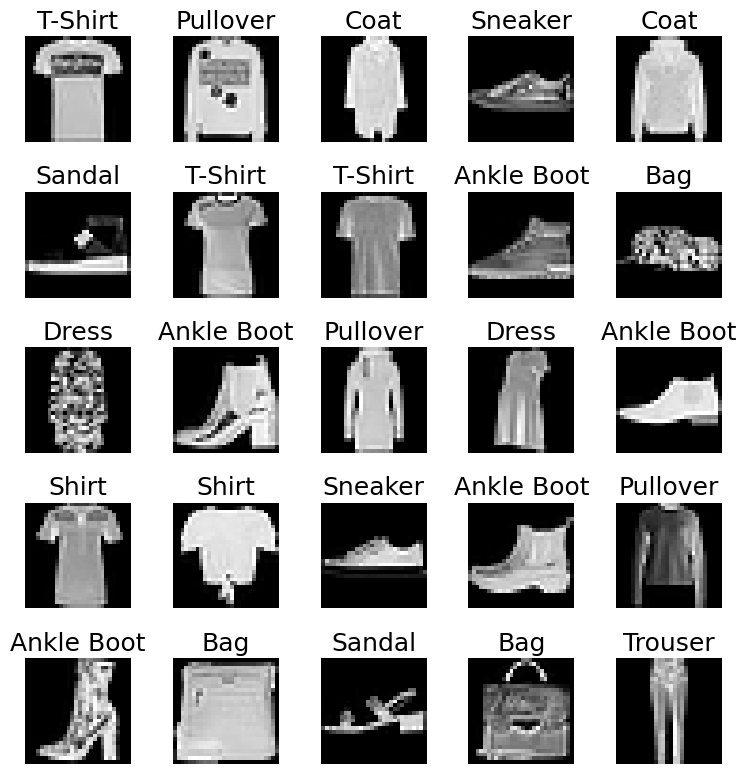

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 204554 (799.04 KB)
Trainable params: 204042 (797.04 KB)
Non-trainable params: 512 (2.00 KB)
_________________________________________________________________
Epoch 1/10
468/468 [==============================] - 4s 5ms/step - loss: 0.4569 - accurac

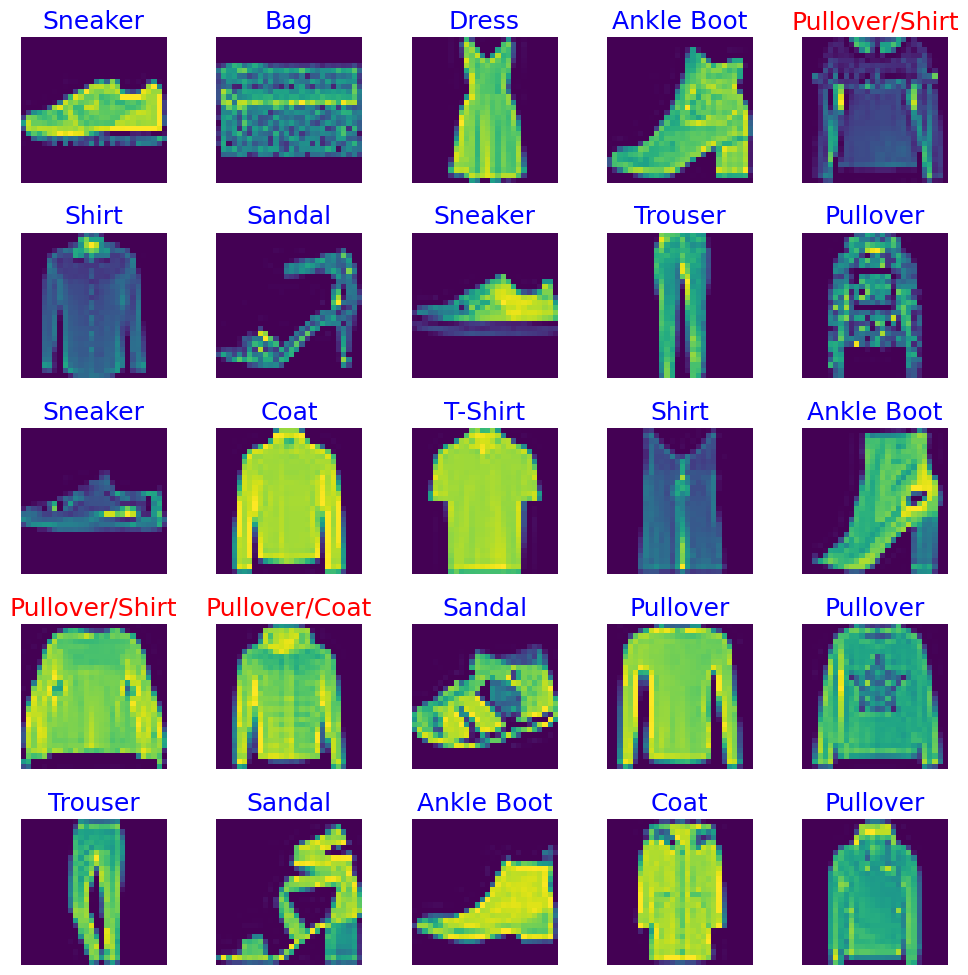

In [4]:

#import Necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

 #Load and Preprocess the Data
    
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train[0])
print(y_train[0])
print(X_train.shape)
print(y_train.shape)

 #Normalize and reshape the data
    
X_train = X_train / 255.
X_train = X_train.reshape([-1, 28*28])
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32) 
X_test = X_test / 255.
X_test = X_test.reshape([-1, 28*28])
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

# Create training dataset

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
    .shuffle(buffer_size=len(X_train))\
    .batch(batch_size=128)\
    .prefetch(buffer_size=128)\
    .repeat() 


# Test dataset

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
      .batch(batch_size=128)\
      .prefetch(buffer_size=128)\
      .repeat()

# Visualize Data

labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train[data_idx]]
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off') 
    plt.tight_layout()
plt.show() 

#Define the Neural Network Mode

model =tf.keras.Sequential(name='nn') 
    
model.add(tf.keras.layers.Dense(256, input_shape=(28*28, )))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy'])

#Train the Model

model.fit(train_ds, batch_size=128, steps_per_epoch=len(X_train)/128,epochs=10)

#Evaluate the Model

loss,acc = model.evaluate(test_ds, steps=len(X_test)/128)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

 #Visualize Predictions
    
test_batch_size = 25
batch_index = np.random.choice(len(X_test), size=test_batch_size,
replace=False)

batch_xs = X_test[batch_index]
batch_ys = y_test[batch_index]
y_pred_ = model(batch_xs,training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue') 

    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                                   labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')
plt.tight_layout()
